# Solutions exercices numpy

In [1]:
import numpy as np
rng = np.random.default_rng()

## Exercice 1

In [2]:
X = rng.uniform(0,1,1000)
Y = rng.normal(0,np.sqrt(2),1000)

np.var(Y)

np.float64(2.137225454423796)

## Exercice 2

In [3]:
x = np.arange(10)
print(x[[0,3,5]])
print(x[::2])
print(x[1:])
print(x[:5])

[0 3 5]
[0 2 4 6 8]
[1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]


## Exercice 3

In [4]:
x = rng.normal(size=10000)

x2 = x[np.abs(x)>=1.96]

print(x2.size)
print(x2.size/x.size)
print(np.sum(np.abs(x2))/np.sum(np.abs(x)))

497
0.0497
0.1454114612377302


## Exercice 4

In [5]:
x = rng.normal(0, size=(3, 4))
y = np.array([np.nan, 0, 1])

print(x)
print(y)
# Question 1
print(np.count_nonzero(y))
# Question 2
print(np.isnan(y))
print(np.sum(np.isnan(y)))
# Question 3
print(np.any(x>0))
print(np.any(x>0, axis = 0))
print(np.any(x>0, axis = 1))

[[-0.54441213 -0.92473821  1.86463073 -0.5689923 ]
 [-0.35313519  0.30059633  0.69986084 -1.24250894]
 [-0.10590216  1.16140775  0.30866123 -1.00927395]]
[nan  0.  1.]
2
[ True False False]
1
True
[False  True  True False]
[ True  True  True]


## Exercice 5

In [6]:
def statdesc(x, axis = None):
    """
    Aggregate statistics on a numpy array

    :param x: Numpy array
    :param axis: Numpy dimension that should be used
    :return: A numpy array with mean, median, sd, min and max
    """

    return np.array([
        np.mean(x, axis = axis),
        np.median(x, axis = axis),
        np.std(x, axis = axis),
        np.min(x, axis = axis),
        np.max(x, axis = axis)
        ])

statdesc(x)
statdesc(x, axis = 0)
statdesc(x, axis = 1)

array([[-0.04337798, -0.14879674,  0.08872322],
       [-0.55670222, -0.02626943,  0.10137953],
       [ 1.11182268,  0.73486978,  0.78142524],
       [-0.92473821, -1.24250894, -1.00927395],
       [ 1.86463073,  0.69986084,  1.16140775]])

## Exercice 7

[0.63047169 0.71717659 0.385709   0.04112921 0.73444179 0.75833675
 0.3321357  0.14106548 0.68249255 0.57548485]
[0.08154485 0.87293653 0.86641477 0.05472937 0.49699639 0.97659136
 0.95677355 0.5985343  0.2030829  0.56656311]
(10, 2)
dimension X1 :  (10, 1, 2)
dimension X2 :  (1, 10, 2)
dimension dist1 :  (10, 10, 2)
dimension dist :  (10, 10)
[[0.         0.7961272  0.82214936 0.58995223 0.42826366 0.90413369
  0.92467812 0.71189643 0.13220313 0.48812526]
 [0.7961272  0.         0.33153175 1.06136846 0.37633638 0.11152794
  0.39406235 0.63812271 0.67075097 0.3375518 ]
 [0.82214936 0.33153175 0.         0.8817984  0.50802018 0.38857473
  0.10504669 0.36278148 0.72669777 0.35486039]
 [0.58995223 1.06136846 0.8817984  0.         0.82236394 1.16799665
  0.94782302 0.55291144 0.65829757 0.73993901]
 [0.42826366 0.37633638 0.50802018 0.82236394 0.         0.48018986
  0.61093798 0.60200116 0.2984692  0.17351322]
 [0.90413369 0.11152794 0.38857473 1.16799665 0.48018986 0.
  0.42666155 0.7238

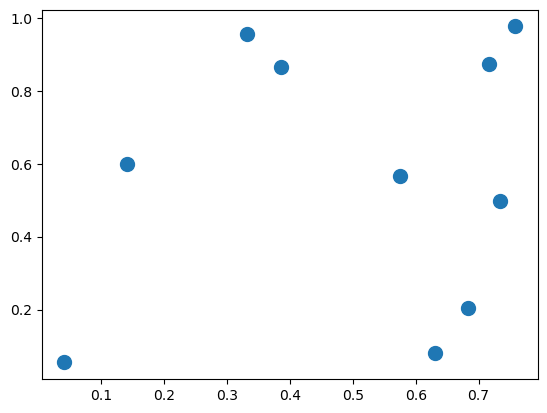

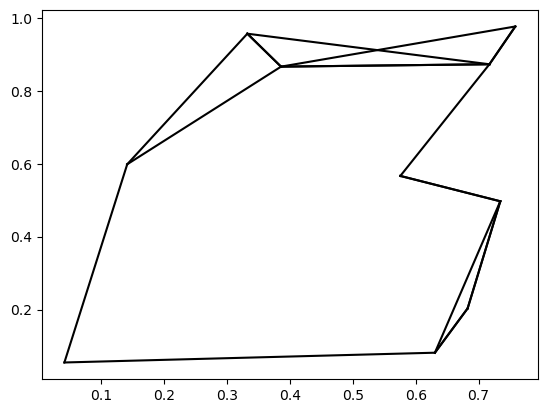

In [7]:
import matplotlib.pyplot as plt
# Question 1
X = rng.uniform(size = (10, 2))

# Question 2 
print(X[:,0])
print(X[:,1])
plt.scatter(X[:, 0], X[:, 1], s=100)

# Question 3
print(X.shape)
X1 = X[:, np.newaxis, :]
print("dimension X1 : ", X1.shape)
X2 = X[np.newaxis, :,:]
print("dimension X2 : ", X2.shape)
dist1 = (X1 - X2) ** 2
print("dimension dist1 : ", dist1.shape)
dist = np.sqrt(np.sum((X1 - X2) ** 2, axis=-1))
print("dimension dist : ", dist.shape)

# Question 4
print(dist)
print(dist.diagonal())

# Question 5 
np.argsort(dist)

# Question 6
K = 2
nearest_partition = np.argpartition(dist, K + 1, axis=1)
print(nearest_partition) # NB: closest point is always itself !

# Question 7 
# Each point in the plot has lines drawn to its two nearest neighbors.
fig = plt.figure()
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')
fig
plt.savefig("knn.png", bbox_inches='tight')